## Scheduler

In [2]:
import torch

In [3]:
class MLP(torch.nn.Module):
    def __init__(self):
        super(MLP,self).__init__()
        self.fc1 = torch.nn.Linear(10,32)
        self.fc2 = torch.nn.Linear(32,16)
        self.fc3 = torch.nn.Linear(16,10)
        
    def forward(self,x):
        x = torch.nn.ReLU()(self.fc1(x))
        x = torch.nn.ReLU()(self.fc2(x))
        output = self.fc3(x)
        return output
    

### Cosine Annealing LR Scheduler

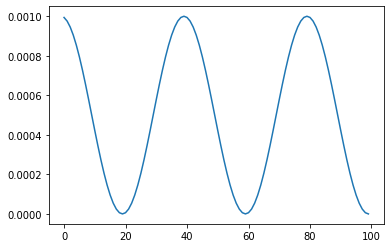

In [28]:
net= MLP()
optimizer = torch.optim.Adam(net.parameters(),lr=1e-3)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer,20)

import matplotlib.pyplot as plt
epochs = range(100)
lr = []
for i in epochs:
    scheduler.step()
    lr.append(scheduler.optimizer.param_groups[0]['lr'])
plt.plot(epochs, lr)

### Step LR Scheduler

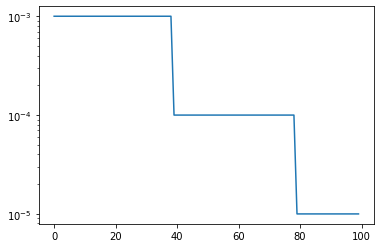

In [25]:
net= MLP()
optimizer = torch.optim.Adam(net.parameters(),lr=1e-3)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer,40)

import matplotlib.pyplot as plt
epochs = range(100)
lr = []
for i in epochs:
    scheduler.step()
    lr.append(scheduler.optimizer.param_groups[0]['lr'])
plt.yscale('log')
plt.plot(epochs, lr)

/Users/tokunagamasaomi/.pyenv/versions/3.7.0/lib/python3.7/site-packages/torch/optim/lr_scheduler.py:100: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule.See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


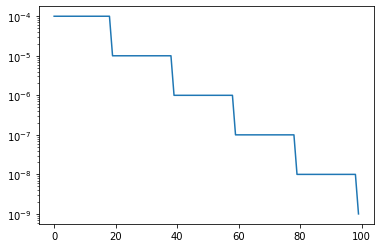

In [4]:
net= MLP()
optimizer = torch.optim.Adam(net.parameters(),lr=1e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer,20)

import matplotlib.pyplot as plt
epochs = range(100)
lr = []
for i in epochs:
    scheduler.step()
    lr.append(scheduler.optimizer.param_groups[0]['lr'])
plt.yscale('log')
plt.plot(epochs, lr)

## Moving Average

In [ ]:
        
for i,g_i in enumerate(g):
    t = i+1
    if i==0:
        g_sma=[1/g_i]
    else:
        g_sma.append((1-beta_2**t)/math.sqrt((sum(g_new[:i])+g_i**2)/t))

In [73]:
[1]+[2]

[1, 2]

In [103]:
def custom_sum(beta_2, t, g_past,g):
    g_past = g_past+g
    res = sum([(beta_2**(t-(i+1))) * (g_past[i]**2) for i in range(t)])
#     print(res)
    return res


In [123]:
import numpy as np
np.random.randn(100)

array([-0.49080381, -1.40061855, -0.74627339,  0.44026587, -1.25883847,
       -1.08154274, -0.69891314,  0.66999151, -0.28417346, -0.56850841,
        0.22609664,  0.53597024, -2.06116404,  1.08779258, -0.52807513,
        0.88363169, -0.84457898, -2.6364664 ,  2.10409798, -1.68427826,
        0.46199263, -1.49169485,  0.76963649,  0.87337369,  0.11035547,
       -0.54500227,  1.85222857,  1.70856399,  0.24255021, -3.01029006,
       -1.16529577, -0.89187406,  0.6801195 ,  1.07578242, -2.03050471,
        0.03672533,  1.74340334,  0.15514672,  1.1025892 ,  0.73767789,
       -0.50044395,  0.38856174,  1.41278917, -0.63018638, -0.57103395,
       -0.92999827,  0.22543357, -1.31884557, -0.43623271, -0.77468345,
        1.67679515, -0.55542579, -0.61545984, -0.02307506, -0.68454594,
       -0.66606515, -0.56453556, -0.96731927,  0.26429526, -0.5483383 ,
        1.13548524, -1.23579346,  1.51867393, -1.32891209,  0.62457523,
       -2.00226425, -1.01031699,  1.27203334, -1.68555053, -0.34

In [166]:
import math
import numpy as np
num_steps = 30
beta_2 = 0.999
g = list(np.random.uniform(0,1,num_steps))
# g = [math.sin(i*0.5)+1 for i in range(num_steps)]
g_sma = [g[0]]
g_ema = [g[0]]

for i,g_i in enumerate(g):
    t = i+1
    if i==0:
        g_sma=[1/g_i]
    else:
        g_sma.append(math.sqrt(t/(sum(g_sma[:i])+g_i**2)))
        
        
        
for i,g_i in enumerate(g):
    t = i+1
    if i==0:
        g_ema=[1/g_i]
    else:
        g_ema.append(math.sqrt((1-beta_2**t)/((1-beta_2)*custom_sum(beta_2,t,g_ema,[g_i]))))

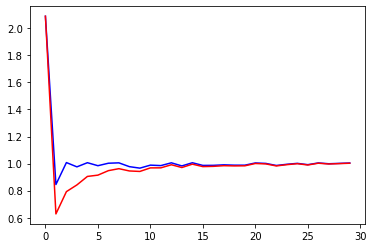

In [167]:
import matplotlib.pyplot as plt
xs = range(len(g_sma))
plt.plot(xs,g_sma,'b')
plt.plot(xs,g_ema,'r')
plt.show()

In [5]:
beta_2 = 0.999

In [47]:
num=50000
# coef_ = [(1-beta_2)/(1-beta_2**t) for t in range(1,num+1)]
# t_inv = [1/n for n in range(1,num+1)]
t = range(1,num+1)
coef = [round((1-beta_2**t)/(1-beta_2)) for t in range(1,num+1)]

In [37]:
import matplotlib.pyplot as plt

(0, 0.01)

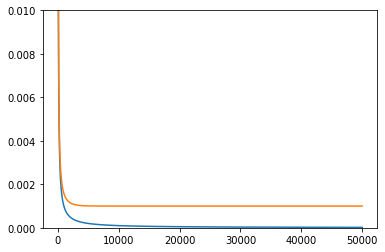

In [38]:
xs = range(1,len(coef_)+1)
# plt.plot(xs, coef_)
plt.plot(range(1,num+1),t_inv)
plt.plot(range(1,num+1),coef_)
plt.ylim(0,0.01)

In [42]:
beta_2s = [beta_2**t for t in range(10)]
beta_2s

[1.0,
 0.999,
 0.998001,
 0.997002999,
 0.996005996001,
 0.995009990004999,
 0.994014980014994,
 0.993020965034979,
 0.992027944069944,
 0.991035916125874]